# Exploratory Data Analysis

In [30]:
import pandas as pd
import numpy as np
import missingno as msno
import joblib
import sweetviz as sv
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt

## ICV action

In [2]:
df_action = joblib.load('../inputs/pre-processed/df_action.pkl')

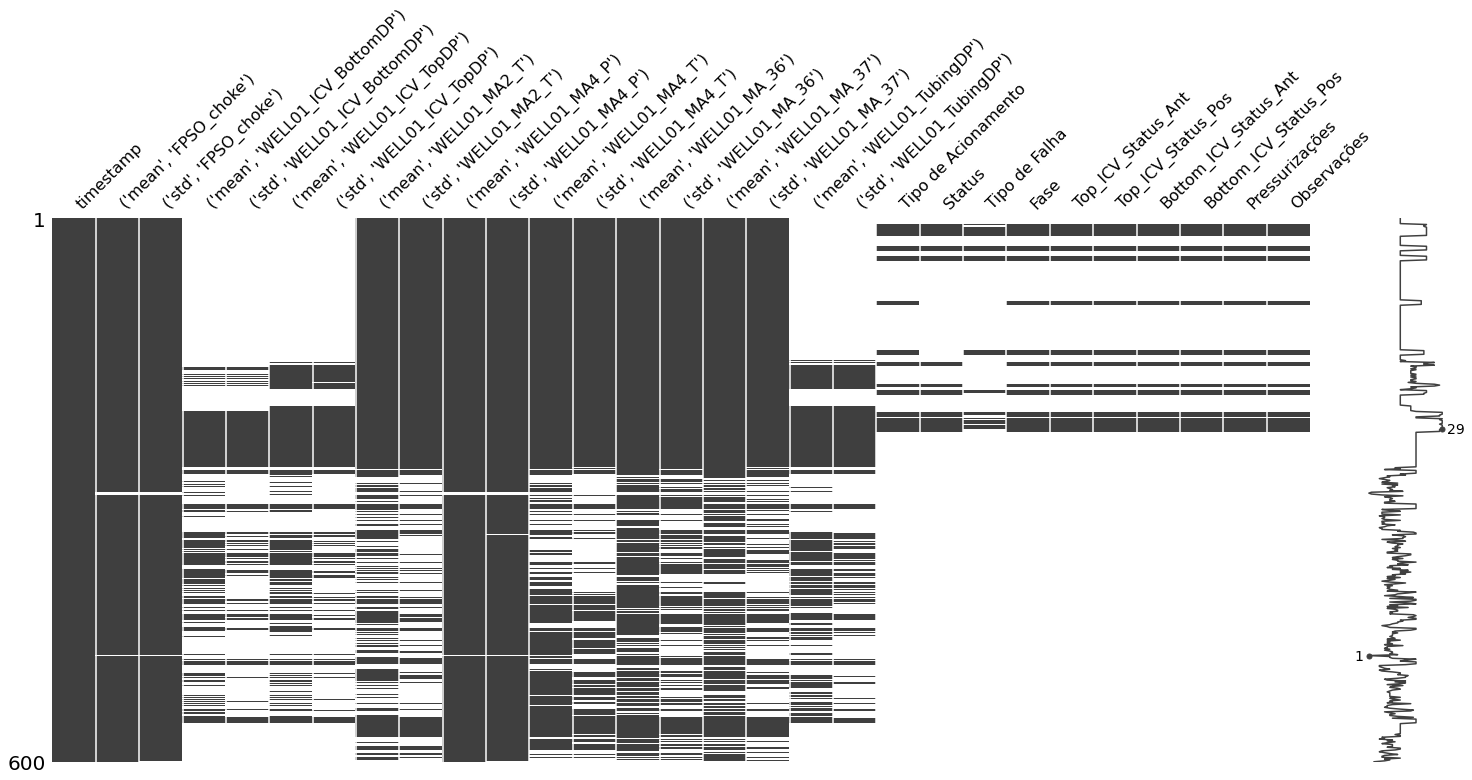

In [3]:
msno.matrix(df_action);

In [4]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    600 non-null    datetime64[ns]
 1   (mean, FPSO_choke)           596 non-null    float64       
 2   (std, FPSO_choke)            594 non-null    float64       
 3   (mean, WELL01_ICV_BottomDP)  199 non-null    float64       
 4   (std, WELL01_ICV_BottomDP)   134 non-null    float64       
 5   (mean, WELL01_ICV_TopDP)     221 non-null    float64       
 6   (std, WELL01_ICV_TopDP)      157 non-null    float64       
 7   (mean, WELL01_MA2_T)         445 non-null    float64       
 8   (std, WELL01_MA2_T)          374 non-null    float64       
 9   (mean, WELL01_MA4_P)         596 non-null    float64       
 10  (std, WELL01_MA4_P)          593 non-null    float64       
 11  (mean, WELL01_MA4_T)         490 non-null    

In [5]:
# From this date on, there is no information about ICV actions anymore
df_action[['timestamp', 'Status']].dropna()['timestamp'].max()

Timestamp('2018-08-24 00:00:00')

### For this reason, data until 2018-08-24 will be set apart as test data, and the simulations will be run only with data from this day on.

## Daily stats

In [6]:
daily_stats = joblib.load('../inputs/pre-processed/daily_stats.pkl')

In [7]:
daily_stats

,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std
,FPSO_choke,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_36,WELL01_MA_37,WELL01_MA_37,WELL01_TubingDP,WELL01_TubingDP
timestamp,,,,,,,,,,,,,,,,,,
2018-01-01,7.985566,2.39215,NaN,NaN,NaN,NaN,83.164979,15.711950,636.882158,65.457068,83.020298,16.121859,3.544051,0.025901,261.210265,0.508914,NaN,NaN
2018-01-02,0.000000,0.00000,NaN,NaN,NaN,NaN,86.045136,0.010122,643.611464,0.005205,86.049245,0.011427,3.556894,0.023622,261.863178,0.243852,NaN,NaN
2018-01-03,0.000000,0.00000,NaN,NaN,NaN,NaN,86.000296,0.014194,643.629433,0.005205,86.000437,0.015920,3.539505,0.020426,260.957794,0.343655,NaN,NaN
2018-01-04,0.000000,0.00000,NaN,NaN,NaN,NaN,85.953056,0.016276,643.646081,0.006029,85.949376,0.018100,3.519772,0.018426,259.927619,0.226779,NaN,NaN
2018-01-05,0.000000,0.00000,NaN,NaN,NaN,NaN,85.902531,0.011860,643.661419,0.004251,85.887897,0.013486,3.520339,0.033162,259.350656,0.050013,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-19,0.000000,0.00000,NaN,NaN,NaN,NaN,88.320483,0.006488,597.337557,0.079846,88.452580,0.002351,76.196758,0.015078,231.664250,0.179332,NaN,NaN
2019-08-20,0.000000,0.00000,NaN,NaN,NaN,NaN,88.334540,NaN,597.020633,0.117995,NaN,NaN,NaN,NaN,231.161000,NaN,NaN,NaN


In [8]:
daily_means = daily_stats[('mean', )].reset_index()
daily_means

C:\Users\rafae\AppData\Local\Temp\ipykernel_6876\3074831163.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  daily_means = daily_stats[('mean', )].reset_index()


,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
0,2018-01-01,7.985566,NaN,NaN,83.164979,636.882158,83.020298,3.544051,261.210265,NaN
1,2018-01-02,0.000000,NaN,NaN,86.045136,643.611464,86.049245,3.556894,261.863178,NaN
2,2018-01-03,0.000000,NaN,NaN,86.000296,643.629433,86.000437,3.539505,260.957794,NaN
3,2018-01-04,0.000000,NaN,NaN,85.953056,643.646081,85.949376,3.519772,259.927619,NaN
4,2018-01-05,0.000000,NaN,NaN,85.902531,643.661419,85.887897,3.520339,259.350656,NaN
...,...,...,...,...,...,...,...,...,...,...
595,2019-08-19,0.000000,NaN,NaN,88.320483,597.337557,88.452580,76.196758,231.664250,NaN
596,2019-08-20,0.000000,NaN,NaN,88.334540,597.020633,NaN,NaN,231.161000,NaN
597,2019-08-21,0.000000,NaN,NaN,88.338510,596.680733,NaN,76.239670,231.832000,NaN
598,2019-08-22,0.000000,NaN,NaN,NaN,596.326500,NaN,NaN,231.328750,NaN


In [9]:
boundary_conditions = daily_means[daily_means['timestamp'] > '2018-08-24']
boundary_conditions

,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
236,2018-08-25,99.922473,5.764381,0.321973,88.668350,590.384170,88.348119,75.890957,160.195841,590.387296
237,2018-08-26,68.706085,4.146374,0.526282,88.232720,604.117217,88.009486,70.741533,157.810118,604.788324
238,2018-08-27,99.971371,5.759581,0.621635,88.575151,591.238026,88.226266,75.897466,176.029715,591.277469
239,2018-08-28,99.959065,5.910111,0.604946,88.622172,589.596961,88.236425,75.921813,175.469734,589.595578
240,2018-08-29,99.945573,5.902125,0.604950,88.624920,589.154736,88.224627,75.918757,176.477912,589.156764
...,...,...,...,...,...,...,...,...,...,...
595,2019-08-19,0.000000,NaN,NaN,88.320483,597.337557,88.452580,76.196758,231.664250,NaN
596,2019-08-20,0.000000,NaN,NaN,88.334540,597.020633,NaN,NaN,231.161000,NaN
597,2019-08-21,0.000000,NaN,NaN,88.338510,596.680733,NaN,76.239670,231.832000,NaN
598,2019-08-22,0.000000,NaN,NaN,NaN,596.326500,NaN,NaN,231.328750,NaN


In [10]:
boundary_conditions.describe()

,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
count,360.000000,165.000000,164.000000,209.000000,360.000000,254.000000,292.000000,267.000000,183.000000
mean,11.672501,5.777481,1.724748,87.527414,600.758583,87.371522,56.065375,212.135951,596.178391
std,30.874127,3.933322,7.915553,2.050057,39.230163,2.538889,30.580475,66.044891,22.922549
min,0.000000,-5.851516,-11.517407,71.815222,213.786267,68.984263,3.353463,77.668765,548.880000
25%,0.000000,1.624800,0.401158,86.568590,584.352050,87.692390,23.057055,189.815663,584.484782
50%,0.000000,6.399300,0.651575,88.524735,587.374260,88.338598,75.414606,225.110018,586.231081
75%,0.000000,8.852800,0.805450,88.696107,639.525411,88.477150,75.619830,226.464000,602.970625
max,99.971371,15.792100,88.904000,89.961498,641.725850,89.034995,76.239670,438.958742,641.641400


In [11]:
boundary_conditions.dropna()

,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
236,2018-08-25,99.922473,5.764381,0.321973,88.668350,590.384170,88.348119,75.890957,160.195841,590.387296
237,2018-08-26,68.706085,4.146374,0.526282,88.232720,604.117217,88.009486,70.741533,157.810118,604.788324
238,2018-08-27,99.971371,5.759581,0.621635,88.575151,591.238026,88.226266,75.897466,176.029715,591.277469
239,2018-08-28,99.959065,5.910111,0.604946,88.622172,589.596961,88.236425,75.921813,175.469734,589.595578
240,2018-08-29,99.945573,5.902125,0.604950,88.624920,589.154736,88.224627,75.918757,176.477912,589.156764
...,...,...,...,...,...,...,...,...,...,...
552,2019-07-07,0.471464,5.886491,3.478630,88.233877,599.237920,88.267467,69.434021,214.198142,601.760072
553,2019-07-08,0.477732,8.339271,4.247538,88.690372,584.629193,88.633015,75.391276,231.805279,584.644288
554,2019-07-09,0.479743,8.408536,4.367979,88.709558,583.932780,88.623517,75.397576,229.283565,583.931629
555,2019-07-10,0.480427,8.434542,4.466822,88.718695,583.602684,88.585281,75.388810,227.401270,583.604723


In [12]:
# Filling NA's with modes for all measured quantities:
for col in boundary_conditions.columns.drop('timestamp'):
    print(f'Column {col} -> mode: {boundary_conditions[col].mode()[0]}')
    boundary_conditions[col] = boundary_conditions[col].fillna(boundary_conditions[col].mode()[0])

Column FPSO_choke -> mode: 0.0
Column WELL01_ICV_BottomDP -> mode: 6.3993
Column WELL01_ICV_TopDP -> mode: 0.7155
Column WELL01_MA2_T -> mode: 88.71454
Column WELL01_MA4_P -> mode: 213.78626666666665
Column WELL01_MA4_T -> mode: 88.32518
Column WELL01_MA_36 -> mode: 75.61983
Column WELL01_MA_37 -> mode: 226.1285
Column WELL01_TubingDP -> mode: 581.9989


C:\Users\rafae\AppData\Local\Temp\ipykernel_6876\1421934570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_conditions[col] = boundary_conditions[col].fillna(boundary_conditions[col].mode()[0])
C:\Users\rafae\AppData\Local\Temp\ipykernel_6876\1421934570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_conditions[col] = boundary_conditions[col].fillna(boundary_conditions[col].mode()[0])
C:\Users\rafae\AppData\Local\Temp\ipykernel_6876\1421934570.py:4: SettingWithCopyWarning: 
A value

In [13]:
boundary_conditions.describe()

,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,11.544231,6.117431,1.170216,88.032921,596.506140,87.659715,59.933289,215.864735,589.127600
std,30.727721,2.661907,5.328004,1.659424,56.160706,2.164474,28.469623,56.874603,17.715722
min,0.000000,-5.851516,-11.517407,71.815222,213.786267,68.984263,3.353463,77.668765,548.880000
25%,0.000000,6.399300,0.715500,88.318050,584.299965,88.214870,69.783055,207.572446,581.998900
50%,0.000000,6.399300,0.715500,88.714540,587.237546,88.325180,75.468049,226.087397,581.998900
75%,0.000000,6.399300,0.715500,88.714540,639.384645,88.414972,75.619830,226.128500,586.255190
max,99.971371,15.792100,88.904000,89.961498,641.725850,89.034995,76.239670,438.958742,641.641400


In [14]:
boundary_conditions.to_csv('../inputs/boundary_conditions.csv')

In [15]:
daily_std = daily_stats[('std', )].reset_index()
daily_std

C:\Users\rafae\AppData\Local\Temp\ipykernel_6876\2502457664.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  daily_std = daily_stats[('std', )].reset_index()


,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
0,2018-01-01,2.39215,NaN,NaN,15.711950,65.457068,16.121859,0.025901,0.508914,NaN
1,2018-01-02,0.00000,NaN,NaN,0.010122,0.005205,0.011427,0.023622,0.243852,NaN
2,2018-01-03,0.00000,NaN,NaN,0.014194,0.005205,0.015920,0.020426,0.343655,NaN
3,2018-01-04,0.00000,NaN,NaN,0.016276,0.006029,0.018100,0.018426,0.226779,NaN
4,2018-01-05,0.00000,NaN,NaN,0.011860,0.004251,0.013486,0.033162,0.050013,NaN
...,...,...,...,...,...,...,...,...,...,...
595,2019-08-19,0.00000,NaN,NaN,0.006488,0.079846,0.002351,0.015078,0.179332,NaN
596,2019-08-20,0.00000,NaN,NaN,NaN,0.117995,NaN,NaN,NaN,NaN
597,2019-08-21,0.00000,NaN,NaN,NaN,0.126154,NaN,0.000000,NaN,NaN
598,2019-08-22,0.00000,NaN,NaN,NaN,0.111944,NaN,NaN,0.237234,NaN


In [16]:
daily_std.describe()

,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
count,594.000000,134.000000,157.000000,374.000000,593.000000,421.000000,433.000000,406.000000,182.000000
mean,1.779993,7.287721,6.878963,1.334842,6.314231,1.554087,2.035092,3.359756,10.940173
std,7.354914,25.823323,24.846522,6.175963,26.534190,7.845246,5.974665,7.820406,26.970974
min,0.000000,0.000000,0.000000,0.000000,0.000268,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.002977,0.001872,0.003266,0.037292,0.003856,0.023815,0.204485,0.051053
50%,0.004828,0.023896,0.012584,0.007230,0.107175,0.009482,0.028094,0.677062,0.203294
75%,0.009782,0.165224,0.249717,0.056921,0.845874,0.039683,0.218037,1.896663,10.809398
max,44.771931,142.282611,162.654246,48.081513,370.288676,70.056804,39.783185,62.092658,217.746720


### Mean of daily standard deviations (used to emulate noise inside the day):
- WELL01_MA4_P
- WELL01_MA_37
- WELL01_MA4_T
- WELL01_MA2_T

In [17]:
daily_std.describe()[['WELL01_MA4_P', 'WELL01_MA_37', \
                      'WELL01_MA4_T', 'WELL01_MA2_T']].loc['mean']

WELL01_MA4_P    6.314231
WELL01_MA_37    3.359756
WELL01_MA4_T    1.554087
WELL01_MA2_T    1.334842
Name: mean, dtype: float64

## Correlations between boundary conditions variables

In [18]:
import seaborn as sns
sns.set_theme(style="ticks")

In [19]:
# Taking only variables used as boundary conditions in simulations
df = boundary_conditions[['WELL01_MA4_P', 'WELL01_MA_37', 'WELL01_MA4_T',
                         'WELL01_MA2_T', 'WELL01_MA_36']]
df

,WELL01_MA4_P,WELL01_MA_37,WELL01_MA4_T,WELL01_MA2_T,WELL01_MA_36
236,590.384170,160.195841,88.348119,88.668350,75.890957
237,604.117217,157.810118,88.009486,88.232720,70.741533
238,591.238026,176.029715,88.226266,88.575151,75.897466
239,589.596961,175.469734,88.236425,88.622172,75.921813
240,589.154736,176.477912,88.224627,88.624920,75.918757
...,...,...,...,...,...
595,597.337557,231.664250,88.452580,88.320483,76.196758
596,597.020633,231.161000,88.325180,88.334540,75.619830
597,596.680733,231.832000,88.325180,88.338510,76.239670
598,596.326500,231.328750,88.325180,88.714540,75.619830


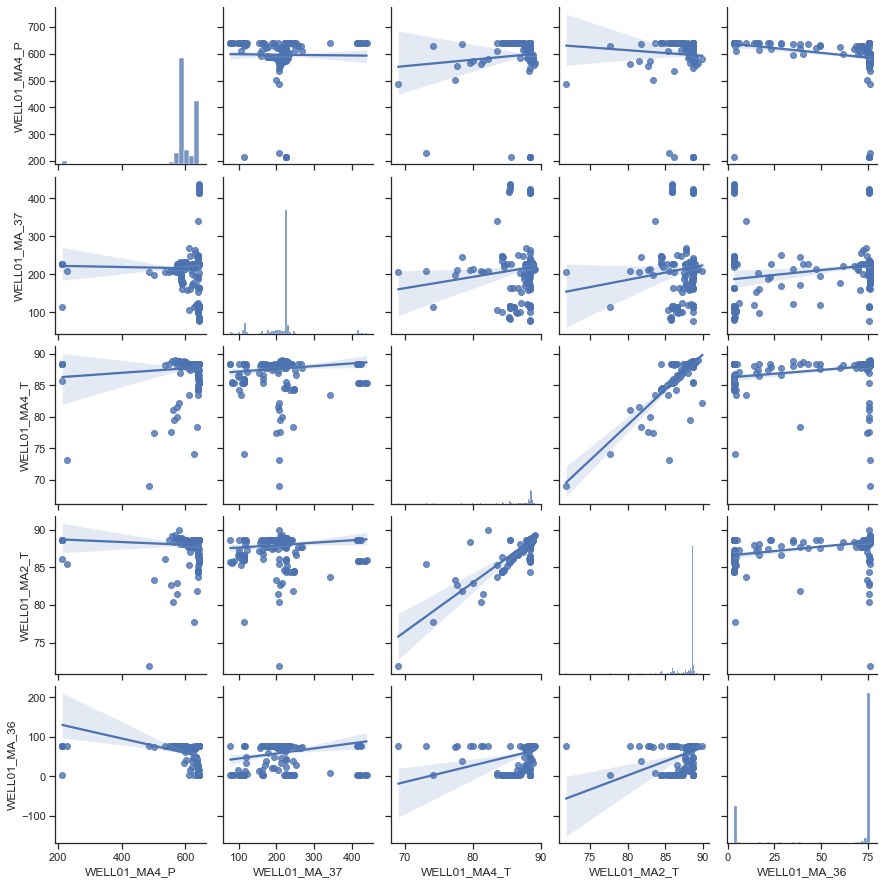

In [20]:
sns.pairplot(df, kind='reg')

In [21]:
df

,WELL01_MA4_P,WELL01_MA_37,WELL01_MA4_T,WELL01_MA2_T,WELL01_MA_36
236,590.384170,160.195841,88.348119,88.668350,75.890957
237,604.117217,157.810118,88.009486,88.232720,70.741533
238,591.238026,176.029715,88.226266,88.575151,75.897466
239,589.596961,175.469734,88.236425,88.622172,75.921813
240,589.154736,176.477912,88.224627,88.624920,75.918757
...,...,...,...,...,...
595,597.337557,231.664250,88.452580,88.320483,76.196758
596,597.020633,231.161000,88.325180,88.334540,75.619830
597,596.680733,231.832000,88.325180,88.338510,76.239670
598,596.326500,231.328750,88.325180,88.714540,75.619830


In [22]:
my_report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [23]:
my_report.show_html(filepath='BC_REPORT.html')

Report BC_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [24]:
report_df_action = sv.analyze(df_action)

                                             |                                             | [  0%]   00:00 ->…

In [25]:
report_df_action.show_html(filepath='WELL_DATA_REPORT.html')

Report WELL_DATA_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## EXPLORATORY DATA ANALYSIS OF BOUNDARY CONDITIONS

In [28]:
for col in df.columns:
    print('-' * 60)
    print(f'Variable: {col}')
    print(f'Number of observations: {len(df[col])}')
    print(f'Number of missing values: {df[col].isnull().sum()}')
    print(f'Number of distinct values: {df[col].nunique()}')
    print(f'Number of zeroes: {np.count_nonzero(df[col] == 0)}')
    print('---')
    print(f'Maximum value: {df[col].max()}')
    print(f'Q3: {np.percentile(df[col], 75)}')
    print(f'Average: {df[col].mean()}')
    print(f'Median: {df[col].median()}')
    print(f'Q1: {np.percentile(df[col], 25)}')
    print(f'Minimum value: {df[col].min()}')
    print('---')
    print(f'Range: {df[col].max() - df[col].min()}')
    print(f'IQR: {np.percentile(df[col], 75) - np.percentile(df[col], 25)}')
    print(f'STD: {df[col].std()}')
    print(f'Kurtosis: {kurtosis(df[col])}')
    print(f'Skewness: {skew(df[col])}')
    print('\n')

------------------------------------------------------------
Variable: WELL01_MA4_P
Number of observations: 364
Number of missing values: 0
Number of distinct values: 360
Number of zeroes: 0
---
Maximum value: 641.72585
Q3: 639.384645
Average: 596.5061395451381
Median: 587.2375464870826
Q1: 584.2999653846153
Minimum value: 213.78626666666665
---
Range: 427.9395833333334
IQR: 55.08467961538463
STD: 56.160705600043634
Kurtosis: 32.05672586643362
Skewness: -5.045910176555036


------------------------------------------------------------
Variable: WELL01_MA_37
Number of observations: 364
Number of missing values: 0
Number of distinct values: 189
Number of zeroes: 0
---
Maximum value: 438.95874215246636
Q3: 226.1285
Average: 215.86473455050654
Median: 226.08739739663093
Q1: 207.5724462280448
Minimum value: 77.668765
---
Range: 361.28997715246635
IQR: 18.55605377195519
STD: 56.87460288839495
Kurtosis: 5.352871930022012
Skewness: 1.0896284290154534


------------------------------------------

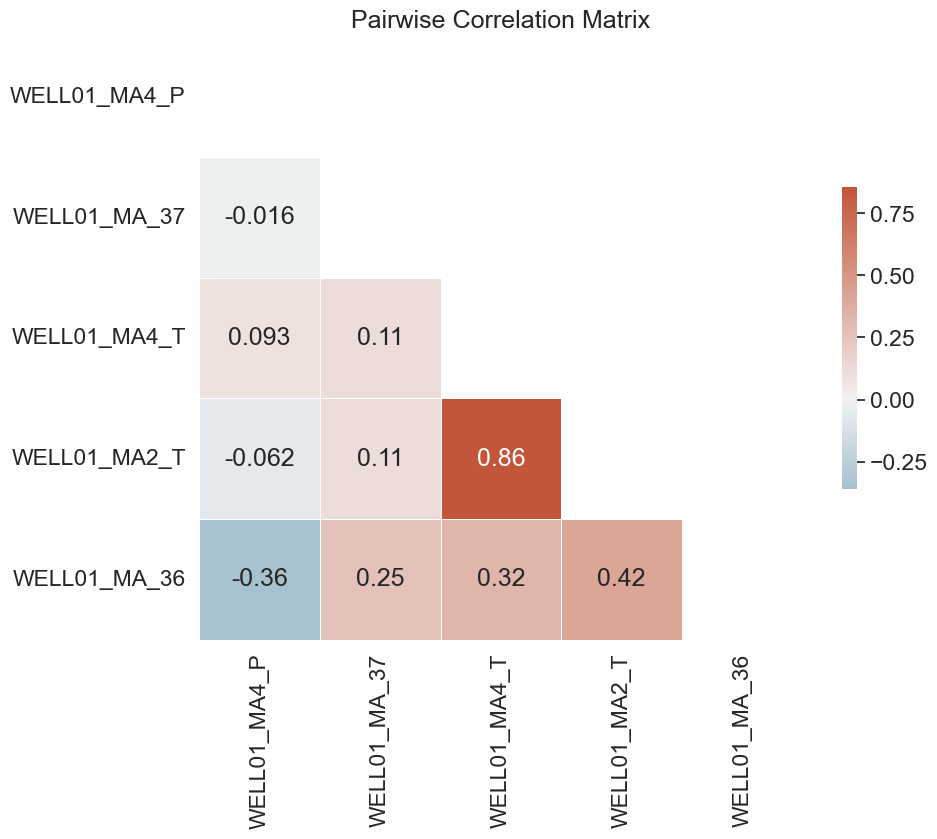

In [31]:
# Generate pairwise correlation matrix
corr = df.corr()

sns.set(style='white', font_scale=1.5)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Pairwise Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

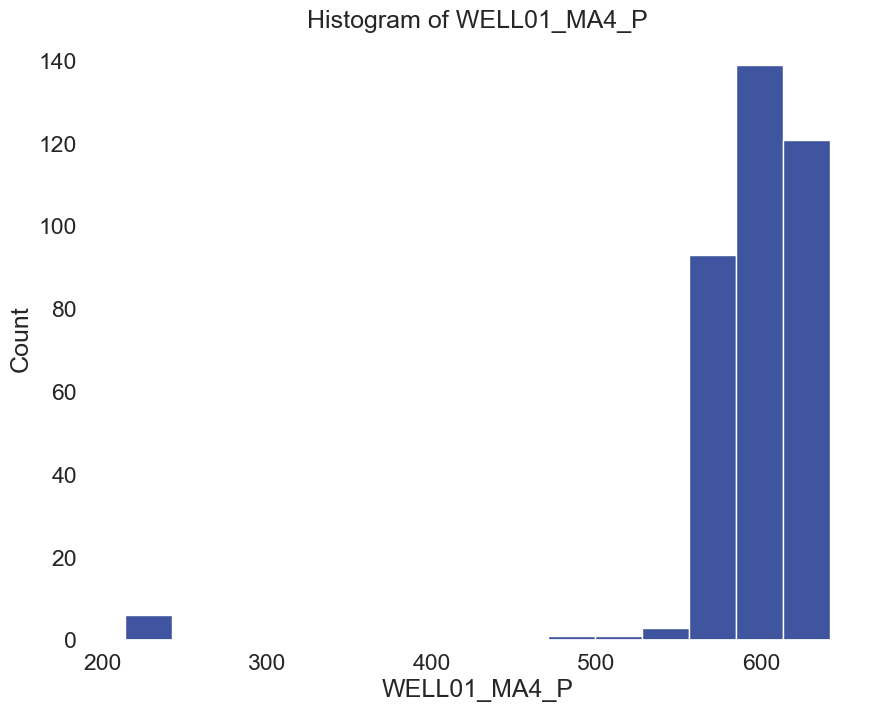

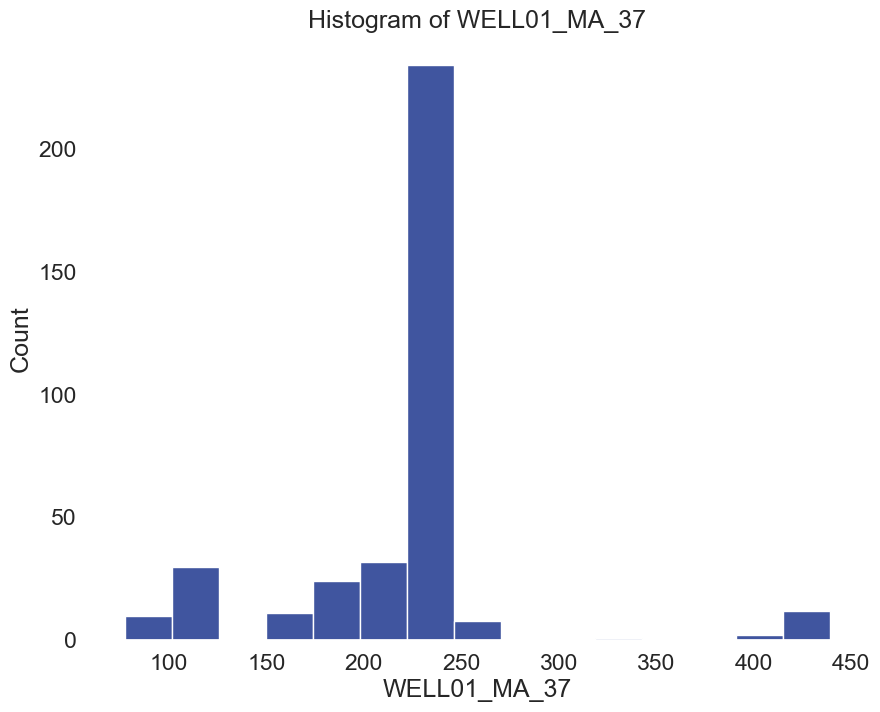

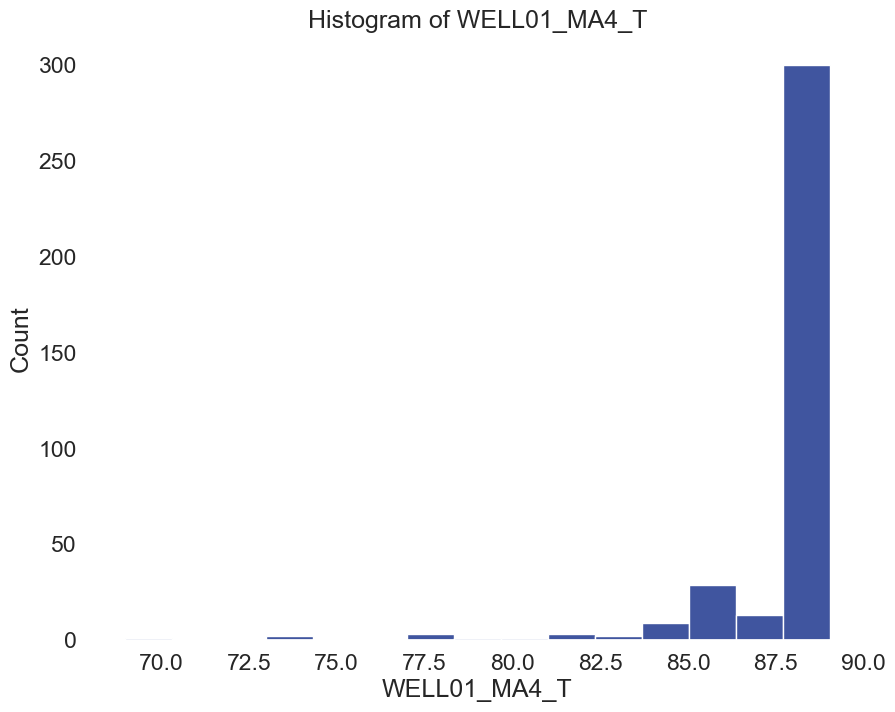

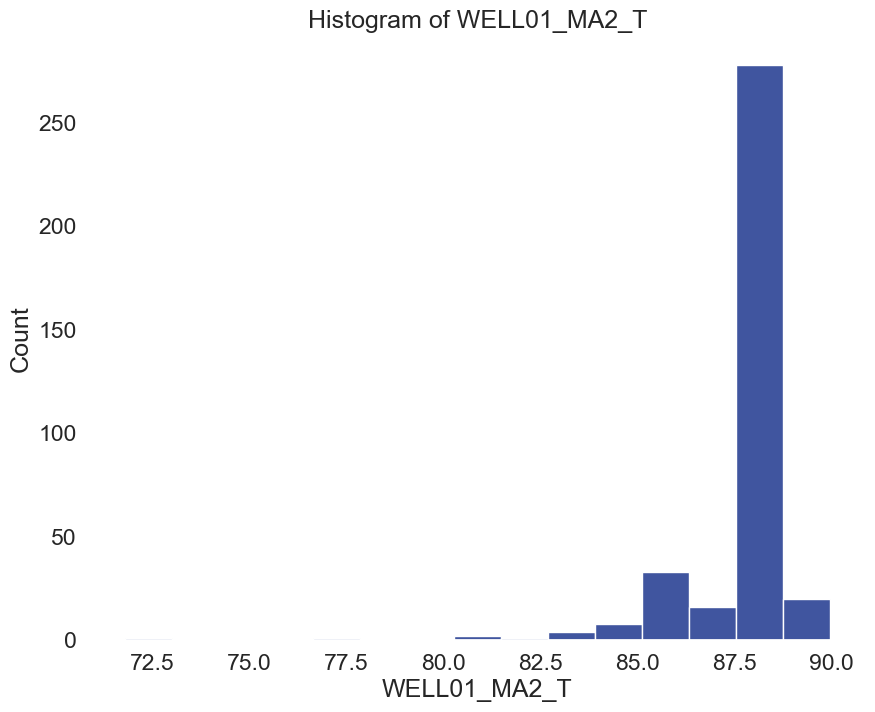

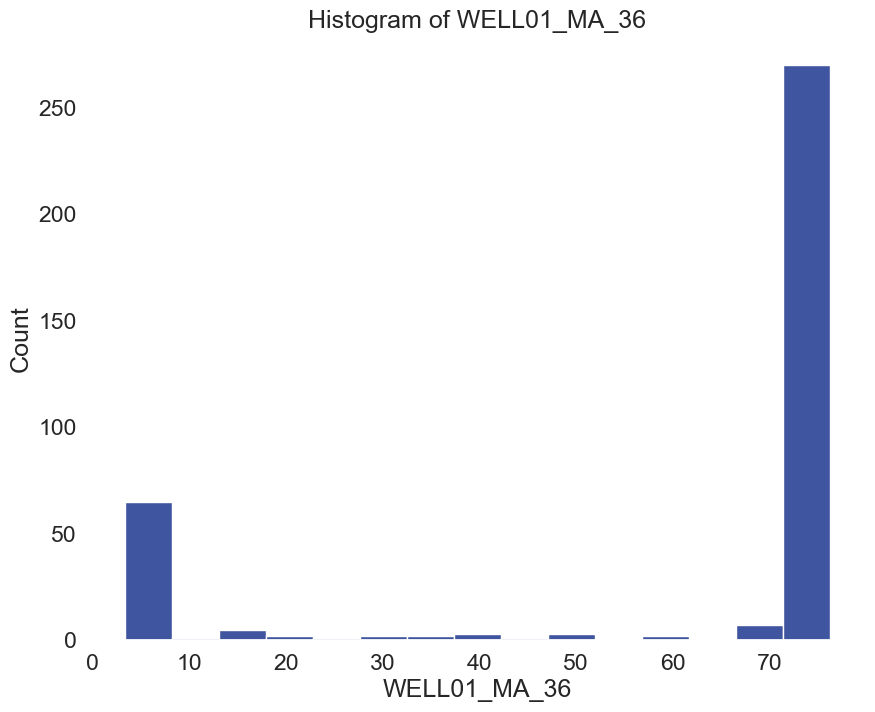

In [44]:
sns.set(style='darkgrid', font_scale=1.5)
sns.set_palette("dark")
for col in df.columns:
    plt.figure(figsize=(10, 8))
    ax = sns.histplot(data=df[col], bins=15)
    ax.set_facecolor("white")
    ax.xaxis.grid(True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.savefig(f'{col}_hist.png')
    plt.show()

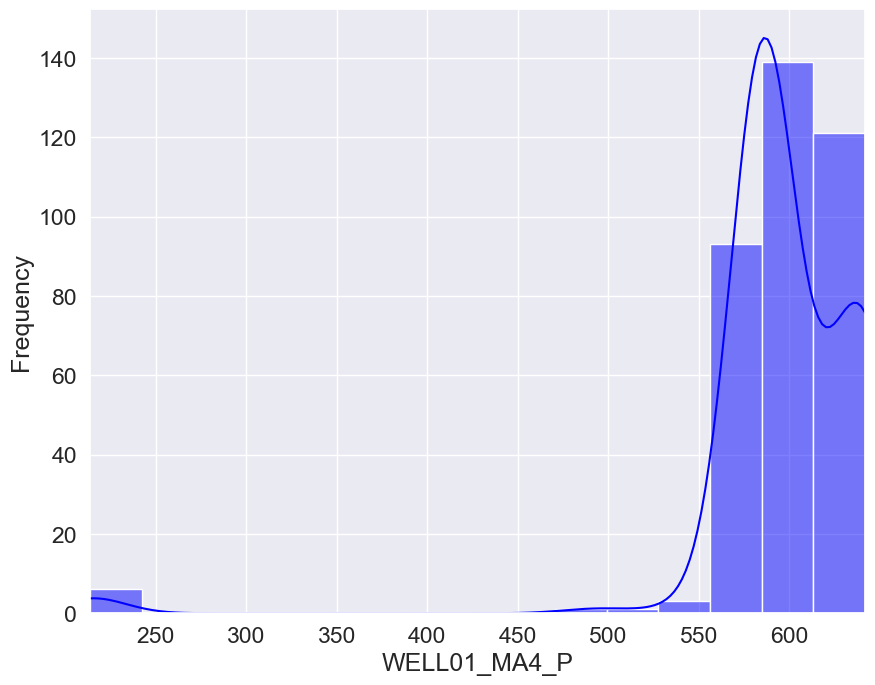

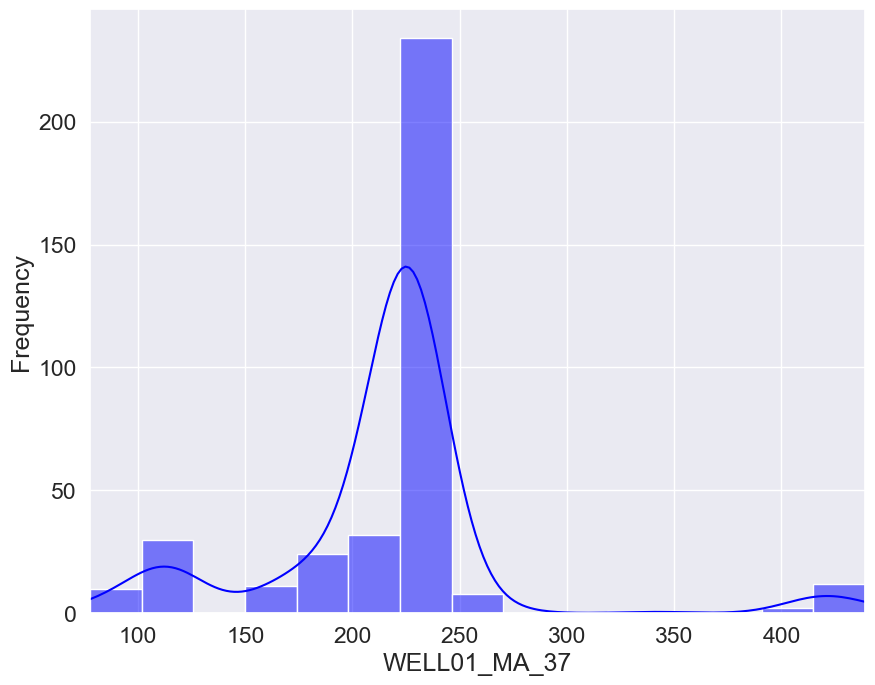

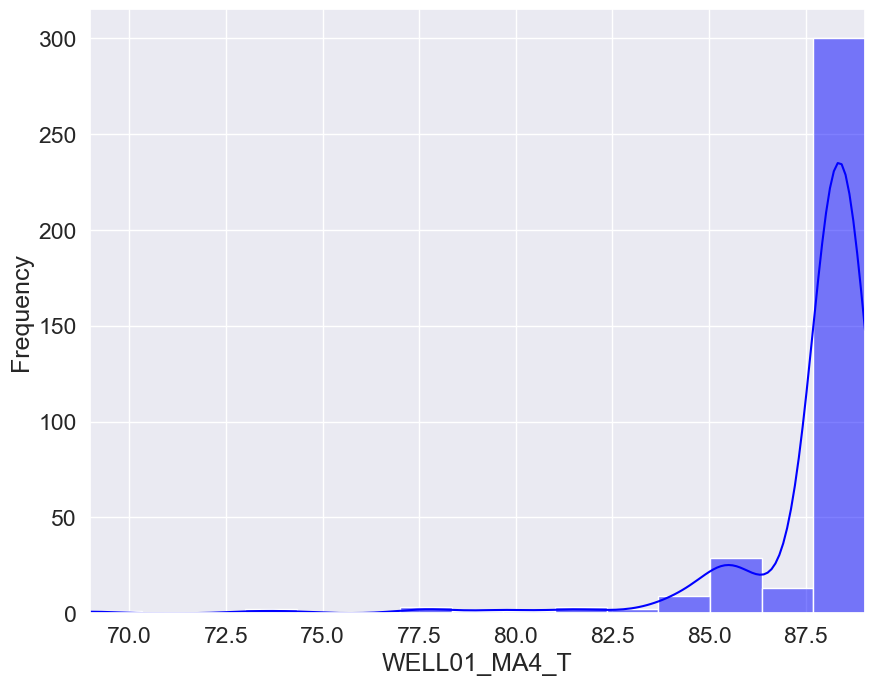

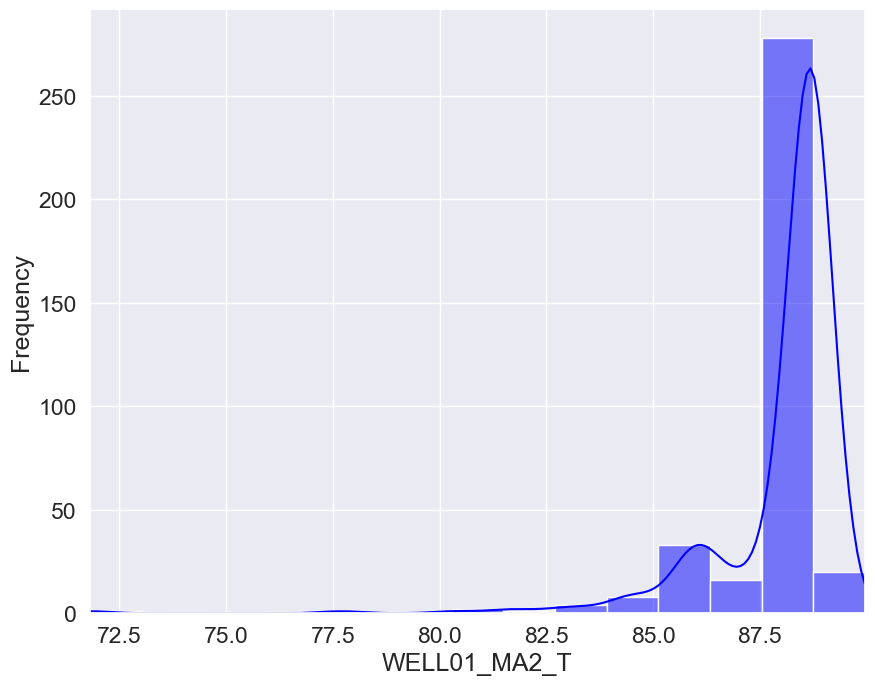

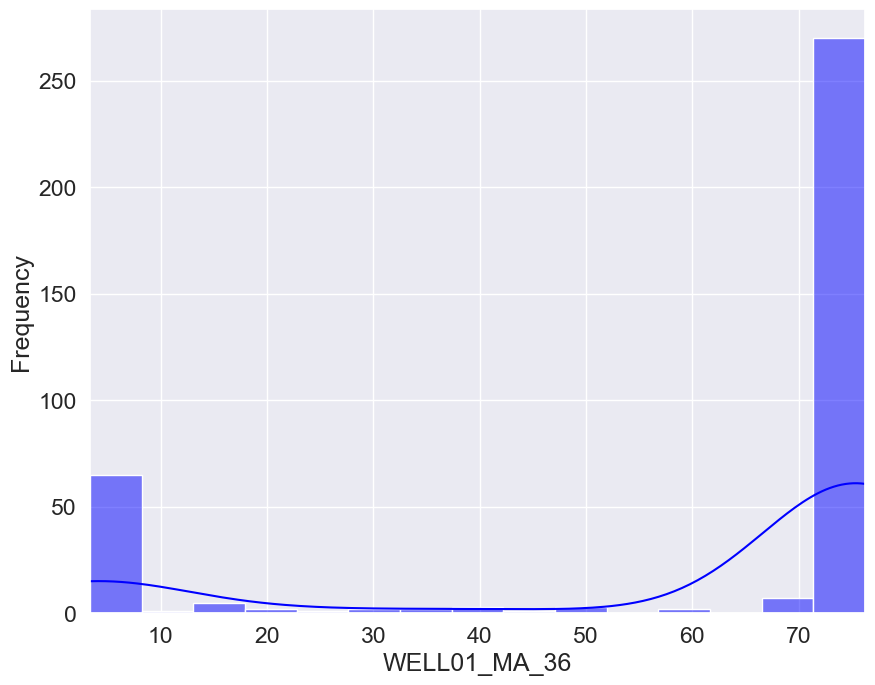

In [46]:
for col in df.columns:
    
    # Create histogram for the variable
    plt.figure()
    plt.hist(df[col], bins=15, range=(min(df[col]), max(df[col])), alpha=0.5, color='blue', density=True)
    
    # Set labels and title
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    
    # Save the histogram
    plt.savefig(f'{col}_hist.png')
    plt.show()